In [2]:
#Importing libraries
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('Cleaned_responses.xlsx')
data.head(3)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of Mouth,Once in a while,5,Strongly agree,4,5
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,Social media,Daily,4,Strongly agree,4,5
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,"RIA, World Remit, TapTap Send",Social media,Daily,4,Strongly agree,4,5


In [4]:
#Create a new column which is Ad_Effect/Content Ratio 

data['Ad_Effect/Content'] = (data['Ad_Effectiveness rating']+ data['Ad_Content_rate'])/2
data.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of Mouth,Once in a while,5,Strongly agree,4,5,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,Social media,Daily,4,Strongly agree,4,5,4.5


In [5]:
#Represent Ad Channel with standard names
#Create a function for media classification
def ad(row):
    if row['Ad Channel'].lower() == 'word of mouth':
        return 'Traditional Media'
    elif row['Ad Channel'] in ['Radio advertisements', 'TV commercials']:
        return 'Digital Media'
    elif row['Ad Channel'].lower() == 'social media':
        return 'Online Media'
    else:
        return 'Mixed Media'

data['Ad Channel type'] = data.apply(ad, axis=1)


In [6]:
data.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Remittance Service,Ad Channel,Ad Exposure,Ad_Effectiveness rating,Ad_Content_rating,User_Satisfaction,Ad_Content_rate,Ad_Effect/Content,Ad Channel type
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,TapTap Send,Word of Mouth,Once in a while,5,Strongly agree,4,5,5.0,Traditional Media
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,World Remit,Social media,Daily,4,Strongly agree,4,5,4.5,Online Media


In [7]:
#Create a new dataframe for easier analysis
Data_2=data[["Gender", "Age", "Occupation", "Educational level", "Ethnicity", "Remittance Frequency","Remittance Service Count","Ad Exposure","Ad_Effectiveness rating","User_Satisfaction","Ad_Content_rate","Ad Channel type","Ad_Effect/Content"]]
Data_2.head(2)

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
0,Female,45-54,Self-employed,High School,Black or African American,Weekly,1,Once in a while,5,4,5,Traditional Media,5.0
1,Male,25-34,Employed,College,Black or African American,Occasionally,1,Daily,4,4,5,Online Media,4.5


In [8]:
#to find total Gender and Ethnicity remits
Gender_count=Data_2[['Gender','Ethnicity']].value_counts()
Gender_count

Gender  Ethnicity                
Male    Black or African American    13
Female  Black or African American    11
Male    Hispanic/Latino               7
Female  Asian                         4
Male    Asian                         4
Female  Caucasian/White               2
        Hispanic/Latino               2
Male    Caucasian/White               2
Female  Other (please specify)        1
Name: count, dtype: int64

In [9]:
#to find Educational levels between Ethnicity
Data_2[['Ethnicity','Educational level']].value_counts()

Ethnicity                  Educational level
Black or African American  Bachelor's Degree    8
                           Master's Degree      7
Hispanic/Latino            College              6
Black or African American  College              5
Asian                      Master's Degree      3
                           Bachelor's Degree    2
                           College              2
Black or African American  Doctorate            2
                           High School          2
Caucasian/White            Bachelor's Degree    2
                           Master's Degree      2
Hispanic/Latino            Bachelor's Degree    2
Asian                      High School          1
Hispanic/Latino            Master's Degree      1
Other (please specify)     Master's Degree      1
Name: count, dtype: int64

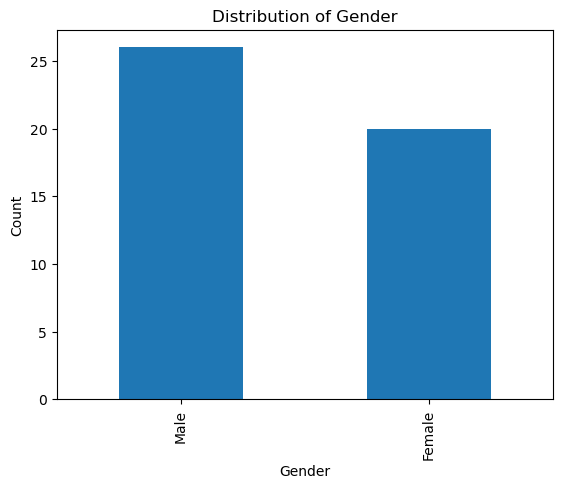

In [8]:
#Showing male vs female remittance
Data_2['Gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Count')

plt.title('Distribution of Gender')

plt.show()

In [6]:
#Ethninicity count
Data_2["Ethnicity"].value_counts()

Ethnicity
Black or African American    24
Hispanic/Latino               9
Asian                         8
Caucasian/White               4
Other (please specify)        1
Name: count, dtype: int64

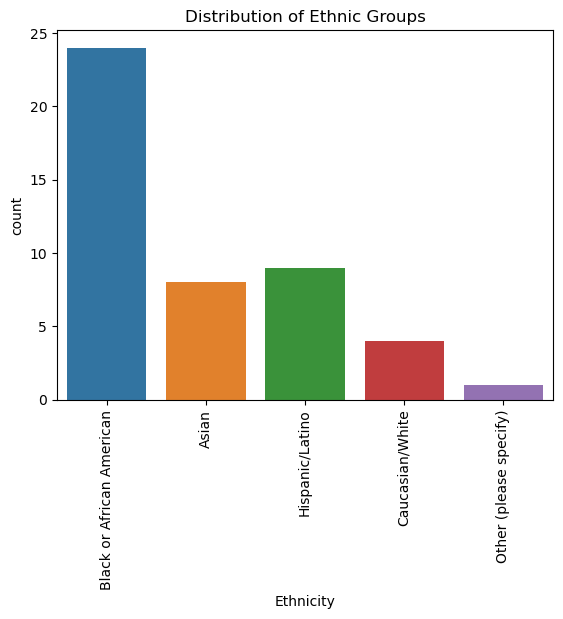

In [10]:
#Showing it visually
sns.countplot(x='Ethnicity', data=Data_2)

plt.title('Distribution of Ethnic Groups')
plt.xticks(rotation=90)

plt.show()

In [11]:
#to find occupation and educational count
Occupation_count=Data_2[['Occupation','Educational level']].value_counts()
Occupation_count

Occupation     Educational level
Employed       Master's Degree      12
               Bachelor's Degree    11
               College              11
               Doctorate             2
Self-employed  Bachelor's Degree     2
               College               2
               High School           2
Employed       High School           1
Retired        Bachelor's Degree     1
               Master's Degree       1
Unemployed     Master's Degree       1
Name: count, dtype: int64

In [12]:
#This is to find remittance count
Remittance_count=Data_2['Remittance Frequency'].value_counts()
Remittance_count

Remittance Frequency
Monthly         26
Weekly           9
Rarely           6
Occasionally     5
Name: count, dtype: int64

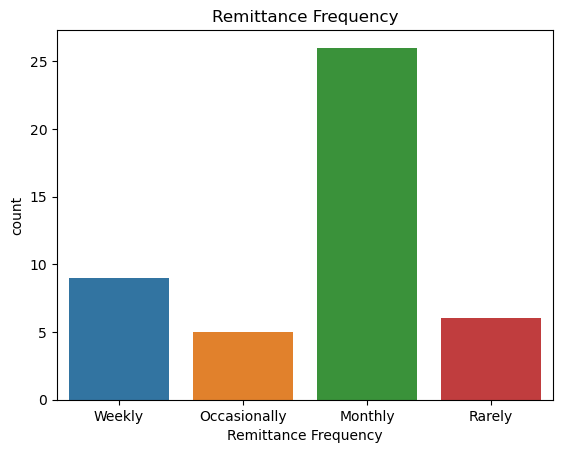

In [13]:
#showing it visually
sns.countplot(x='Remittance Frequency', data=Data_2)

plt.title('Remittance Frequency')
#plt.xticks(rotation=90)

plt.show()

In [14]:
#This is to find Ad channel count
Chanel_count=Data_2['Ad Channel type'].value_counts()
Chanel_count

Ad Channel type
Online Media         20
Mixed Media          15
Traditional Media    11
Name: count, dtype: int64

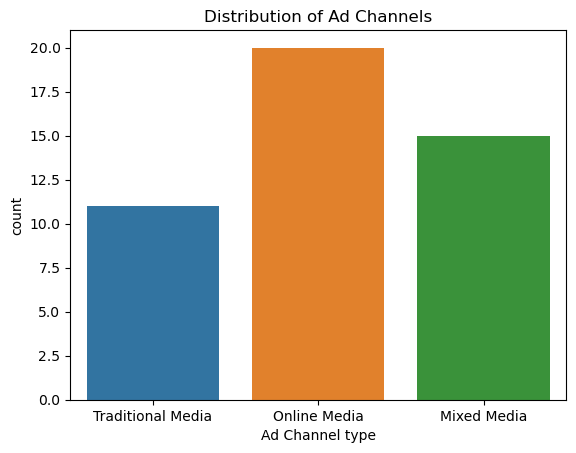

In [15]:
#Visually
sns.countplot(x='Ad Channel type', data=Data_2)

plt.title('Distribution of Ad Channels')
#plt.xticks(rotation=90)

plt.show()

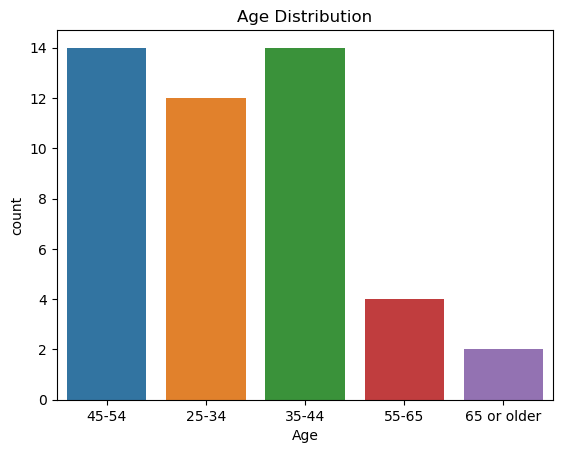

In [16]:
#Age Distribution
sns.countplot(x='Age', data=Data_2)

plt.title('Age Distribution')
#plt.xticks(rotation=90)

plt.show()

In [17]:
#Age Distribution
Data_2['Age'].value_counts()

Age
45-54          14
35-44          14
25-34          12
55-65           4
65 or older     2
Name: count, dtype: int64

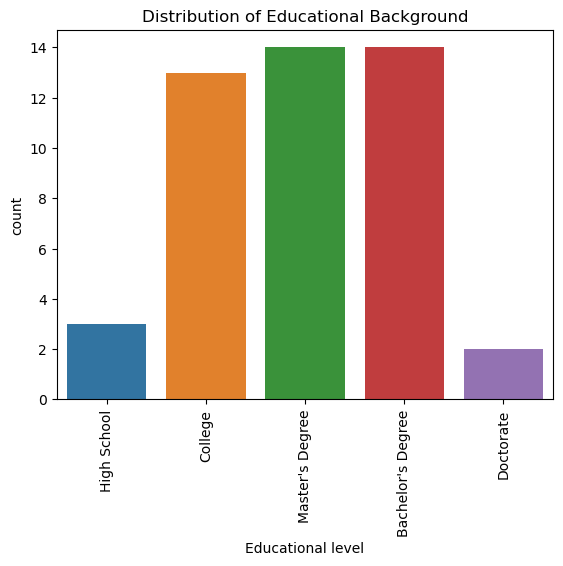

In [18]:
# visually Educational level
sns.countplot(x='Educational level', data=Data_2)

plt.title('Distribution of Educational Background')
plt.xticks(rotation=90)

plt.show()

In [19]:
#This is to find to find average remittance apps used amongst Gender and ethnicity
Data_2.groupby(['Gender','Ethnicity']).agg({'Remittance Service Count':"mean"}).reset_index()

,Gender,Ethnicity,Remittance Service Count
0,Female,Asian,1.000000
1,Female,Black or African American,1.636364
2,Female,Caucasian/White,1.000000
3,Female,Hispanic/Latino,2.500000
4,Female,Other (please specify),1.000000
5,Male,Asian,1.000000
6,Male,Black or African American,1.769231
7,Male,Caucasian/White,1.000000
8,Male,Hispanic/Latino,1.142857


In [20]:
#This is to find to find average remittance apps used amongst male and female
Data_2.groupby(['Gender']).agg({'Remittance Service Count':"mean"}).reset_index()

,Gender,Remittance Service Count
0,Female,1.500000
1,Male,1.423077


In [21]:
# find average user satisfaction rate amongst gender and ethnicity
Data_2.groupby(['Gender','Ethnicity']).agg({'Ad_Effect/Content':'mean','User_Satisfaction':'mean'})

Ad_Effect/Content  User_Satisfaction
Gender Ethnicity                                                      
Female Asian                               2.000000           4.000000
       Black or African American           4.136364           4.181818
       Caucasian/White                     3.250000           4.500000
       Hispanic/Latino                     4.500000           4.000000
       Other (please specify)              1.000000           3.000000
Male   Asian                               4.625000           4.250000
       Black or African American           4.461538           4.461538
       Caucasian/White                     3.500000           4.000000
       Hispanic/Latino                     4.071429           4.714286

In [22]:
# find average user satisfaction rate amongst male and female
Data_2.groupby(['Gender']).agg({'Ad_Effect/Content':'mean','User_Satisfaction':'mean'})

,Ad_Effect/Content,User_Satisfaction
Gender,,
Female,3.500000,4.100000
Male,4.307692,4.461538


In [23]:
# finding average user satisfaction amongst gender and educational level
Data_2.groupby(['Gender','Educational level']).agg({'Ad_Effect/Content':'mean','User_Satisfaction':'mean'})

Ad_Effect/Content  User_Satisfaction
Gender Educational level                                      
Female Bachelor's Degree           3.700000           4.000000
       College                     4.500000           4.666667
       High School                 5.000000           4.000000
       Master's Degree             3.000000           4.000000
Male   Bachelor's Degree           4.000000           4.000000
       College                     4.400000           4.800000
       Doctorate                   4.000000           5.000000
       High School                 4.750000           4.000000
       Master's Degree             4.833333           4.666667

In [24]:
#finding the average Ad exposure amongst Gender
Data_2.groupby(['Ad Exposure','Gender']).agg({'Ad_Effect/Content':'mean'})

Ad_Effect/Content
Ad Exposure     Gender                   
Daily           Female           4.000000
                Male             4.500000
Once in a while Female           3.250000
                Male             4.166667
Weekly          Female           3.166667
                Male             4.375000

In [25]:
#find the average user satisfaction amongst Gender and Ad channel type
Data_2.groupby(['Gender','Ad Channel type']).agg({'Ad_Effect/Content':'mean','User_Satisfaction':'mean'})

Ad_Effect/Content  User_Satisfaction
Gender Ad Channel type                                        
Female Mixed Media                 3.000000           4.000000
       Online Media                3.772727           4.181818
       Traditional Media           3.214286           4.000000
Male   Mixed Media                 4.384615           4.538462
       Online Media                4.277778           4.333333
       Traditional Media           4.125000           4.500000

In [16]:
#find ad channel type amongst Gender
Data_2.groupby(['Ad Channel type', 'Gender']).size().reset_index(name='Count')


,Ad Channel type,Gender,Count
0,Mixed Media,Female,2
1,Mixed Media,Male,13
2,Online Media,Female,11
3,Online Media,Male,9
4,Traditional Media,Female,7
5,Traditional Media,Male,4


In [19]:
#find ad channel type amongst age groups
Data_2.groupby(['Ad Channel type', 'Age']).size().reset_index(name='Count')

,Ad Channel type,Age,Count
0,Mixed Media,35-44,4
1,Mixed Media,45-54,7
2,Mixed Media,55-65,2
3,Mixed Media,65 or older,2
4,Online Media,25-34,10
5,Online Media,35-44,8
6,Online Media,45-54,2
7,Traditional Media,25-34,2
8,Traditional Media,35-44,2
9,Traditional Media,45-54,5


In [26]:
#To find which gender remits monthly
monthly_counts=Data_2[Data_2['Remittance Frequency'] == 'Monthly'].groupby('Gender').size()
monthly_counts

Gender
Female     9
Male      17
dtype: int64

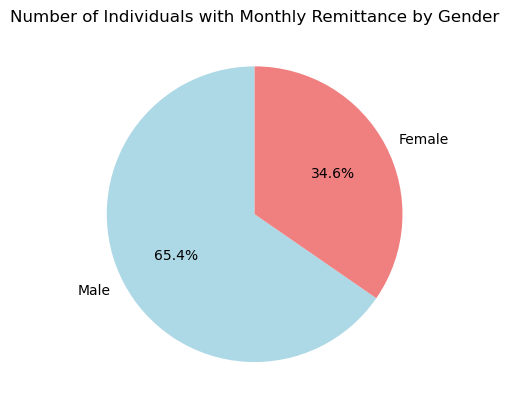

In [27]:
#visually
# Filter data for monthly remittances
monthly_data = Data_2[Data_2['Remittance Frequency'] == 'Monthly']

# Count the occurrences for each gender
monthly_counts = monthly_data['Gender'].value_counts()

# Create a pie chart
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

plt.title('Number of Individuals with Monthly Remittance by Gender')

plt.show()

In [28]:
#to find which Ethinity remits monthly
Data_2[Data_2['Remittance Frequency'] =='Monthly'].groupby('Ethnicity').size()

Ethnicity
Asian                         5
Black or African American    13
Caucasian/White               2
Hispanic/Latino               6
dtype: int64

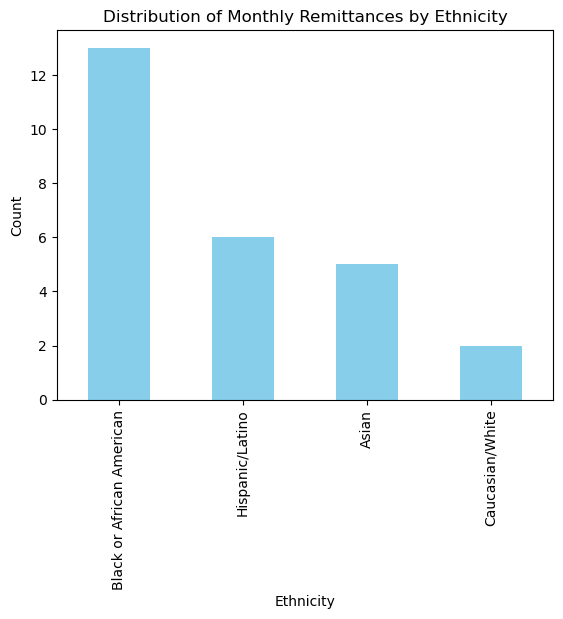

In [29]:
#Showing it visually
# Filter data for monthly remittances
monthly_data = Data_2[Data_2['Remittance Frequency'] == 'Monthly']

# Group by ethnicity and count occurrences
monthly_counts_by_ethnicity = monthly_data['Ethnicity'].value_counts()


monthly_counts_by_ethnicity.plot(kind='bar', color='skyblue')

plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Monthly Remittances by Ethnicity')

plt.show()


In [30]:
#to find  gender who remit monthly and what type of Ad channel they use
Data_2[Data_2['Remittance Frequency'] == 'Monthly'].groupby(['Ad Channel type', 'Gender']).size().reset_index(name='Count')

,Ad Channel type,Gender,Count
0,Mixed Media,Female,1
1,Mixed Media,Male,9
2,Online Media,Female,6
3,Online Media,Male,7
4,Traditional Media,Female,2
5,Traditional Media,Male,1


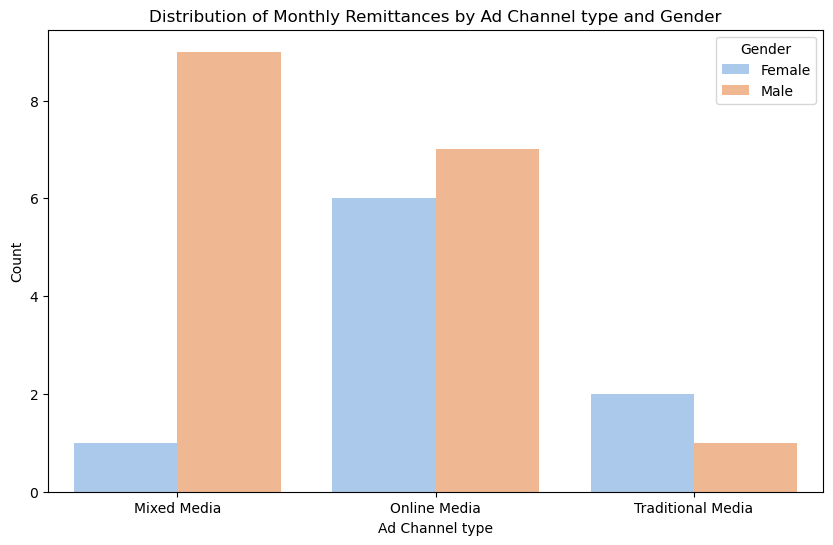

In [31]:
#Showing it Visually
# Filter data for monthly remittances
monthly_data = Data_2[Data_2['Remittance Frequency'] == 'Monthly']

# Group by advertising channel type and gender, and count occurrences
monthly_counts_by_channel_gender = monthly_data.groupby(['Ad Channel type', 'Gender']).size().reset_index(name='Count')

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Ad Channel type', y='Count', hue='Gender', data=monthly_counts_by_channel_gender, palette='pastel')


plt.xlabel('Ad Channel type')
plt.ylabel('Count')
plt.title('Distribution of Monthly Remittances by Ad Channel type and Gender')

plt.show()

In [32]:
#To find which gender remits weekly
weekly_counts=Data_2[Data_2['Remittance Frequency'] == 'Weekly'].groupby('Gender').size()
weekly_counts

Gender
Female    5
Male      4
dtype: int64

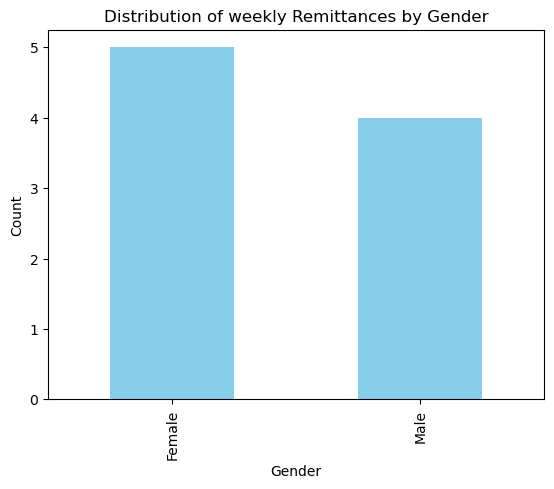

In [33]:
#Visually
# Filter data for monthly remittances
weekly_data = Data_2[Data_2['Remittance Frequency'] == 'Weekly']

# Group by ethnicity and count occurrences
weekly_counts_by_gender = weekly_data['Gender'].value_counts()


weekly_counts_by_gender.plot(kind='bar', color='skyblue')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of weekly Remittances by Gender')

plt.show()

In [34]:
#finding which Ethnicity who remits weekly
Data_2[Data_2['Remittance Frequency'] =='Weekly'].groupby('Ethnicity').size()

Ethnicity
Black or African American    7
Hispanic/Latino              2
dtype: int64

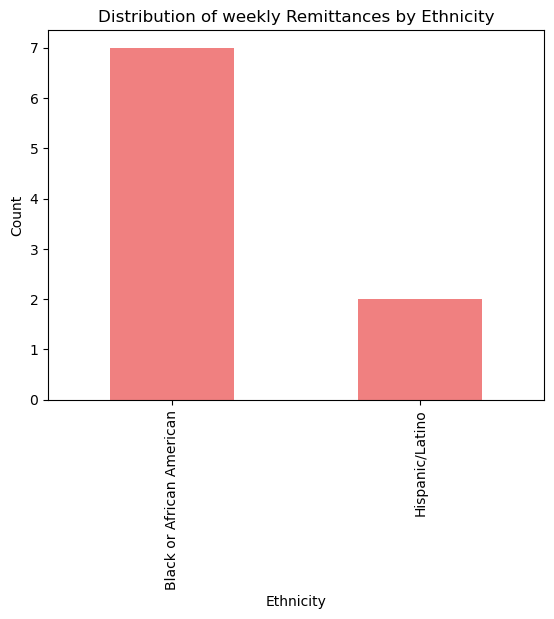

In [35]:
#Showing it visually
# Filter data for weekly remittances
weekly_data = Data_2[Data_2['Remittance Frequency'] == 'Weekly']

# Group by ethnicity and count occurrences
weekly_counts_by_Ethnicity = weekly_data['Ethnicity'].value_counts()


weekly_counts_by_Ethnicity.plot(kind='bar', color='lightcoral')

plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of weekly Remittances by Ethnicity')

plt.show()

In [36]:
#to find which  gender who remit weekly and what type of Ad channel they use
Data_2[Data_2['Remittance Frequency'] == 'Weekly'].groupby(['Ad Channel type', 'Gender']).size().reset_index(name='Count')


,Ad Channel type,Gender,Count
0,Mixed Media,Male,3
1,Online Media,Female,2
2,Traditional Media,Female,3
3,Traditional Media,Male,1


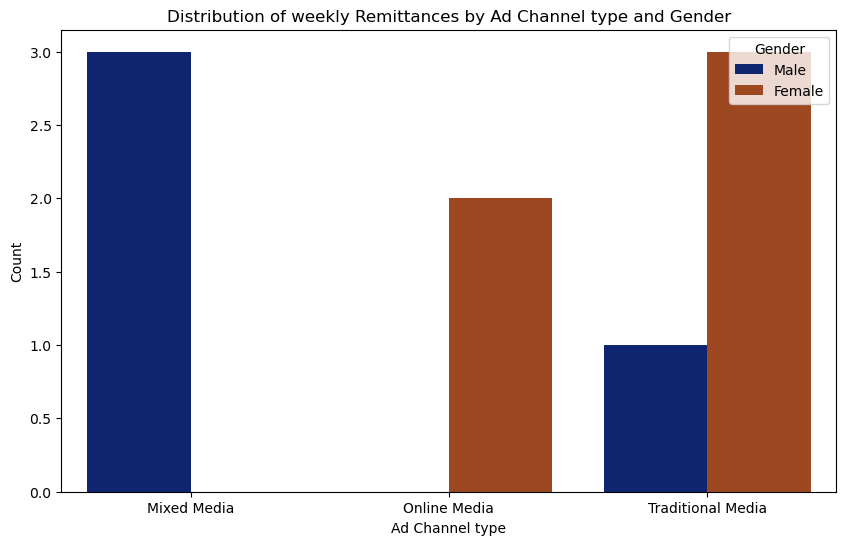

In [37]:
#Visually
# Filter data for weekly remittances
weekly_data = Data_2[Data_2['Remittance Frequency'] == 'Weekly']

# Group by advertising channel type and gender, and count occurrences
weekly_counts_by_channel_gender = weekly_data.groupby(['Ad Channel type', 'Gender']).size().reset_index(name='Count')

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Ad Channel type', y='Count', hue='Gender', data=weekly_counts_by_channel_gender, palette='dark')


plt.xlabel('Ad Channel type')
plt.ylabel('Count')
plt.title('Distribution of weekly Remittances by Ad Channel type and Gender')

plt.show()

In [38]:
#To find which ethnicity remits Rarely
rare_counts=Data_2[Data_2['Remittance Frequency'] =='Rarely'].groupby('Ethnicity').size()
rare_counts

Ethnicity
Asian                        3
Black or African American    1
Caucasian/White              1
Other (please specify)       1
dtype: int64

In [39]:
#To find which ethnicity remits occasionally
ocassional_counts=Data_2[Data_2['Remittance Frequency'] =='Occasionally'].groupby('Ethnicity').size()
ocassional_counts

Ethnicity
Black or African American    3
Caucasian/White              1
Hispanic/Latino              1
dtype: int64

In [40]:
#Just to filter monthly remitters by Online media and Daily exposure
filtered = Data_2[(Data_2['Remittance Frequency']=='Monthly') &
(Data_2['Ad Channel type']== 'Online Media') &
(Data_2['Ad Exposure']== 'Daily')]
filtered.shape[0]

7

In [10]:
#Just to filter monthly remitters by Online media and Weekly exposure
filtered = Data_2[(Data_2['Remittance Frequency']=='Monthly') &
(Data_2['Ad Channel type']== 'Online Media') &
(Data_2['Ad Exposure']== 'Weekly')]
filtered.shape[0]

3

In [41]:
#Just to filter weekly remitters by Online media and Daily exposure
filtered_2 = Data_2[(Data_2['Remittance Frequency']=='Weekly') &
(Data_2['Ad Channel type']== 'Online Media') &
(Data_2['Ad Exposure']== 'Daily')]
filtered_2.shape[0]

2

In [42]:
#Just to filter monthly remitters by Online media and less exposure
filtered_3 = Data_2[(Data_2['Remittance Frequency']=='Monthly') &
(Data_2['Ad Channel type']== 'Online Media') &
(Data_2['Ad Exposure']== 'Once in a while')] 
filtered_3.shape[0]

3

In [43]:
#Just to filter occassionally & rarely remitters by Online media and exposure once in a while
filtered_4 = Data_2[(Data_2['Remittance Frequency']=='Ocassionally') & (Data_2['Remittance Frequency']== 'Rarely') &
(Data_2['Ad Channel type']== 'Online Media') &
(Data_2['Ad Exposure']== 'Once in a while')]
filtered_4.shape[0]

0

In [44]:
#to filter monthly remitters by traditional media and less exposure
filtered_5 = Data_2[(Data_2['Remittance Frequency']=='Monthly')  &
(Data_2['Ad Channel type']== 'Traditional media') &
(Data_2['Ad Exposure']== 'Once in a while')]
filtered_5.shape[0]

0

In [45]:
#to filter weekly remitters by Online media and much exposure
filtered_6 = Data_2[(Data_2['Remittance Frequency']=='Weekly')  &
(Data_2['Ad Channel type']== 'Online Media') |
(Data_2['Ad Exposure']== 'Daily')]
filtered_6.shape[0]

13

In [46]:
#filtering for highest remittance service/apps
Data_2[Data_2['Remittance Service Count']==Data_2['Remittance Service Count'].max()]

,Gender,Age,Occupation,Educational level,Ethnicity,Remittance Frequency,Remittance Service Count,Ad Exposure,Ad_Effectiveness rating,User_Satisfaction,Ad_Content_rate,Ad Channel type,Ad_Effect/Content
2,Female,25-34,Employed,Master's Degree,Black or African American,Weekly,4,Daily,4,4,5,Online Media,4.5
4,Male,35-44,Employed,Master's Degree,Black or African American,Weekly,4,Daily,4,4,5,Mixed Media,4.5


In [47]:
#multiple descriptive statistics of data
Data_2.describe()

,Remittance Service Count,Ad_Effectiveness rating,User_Satisfaction,Ad_Content_rate,Ad_Effect/Content
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.456522,3.869565,4.304348,4.043478,3.956522
std,0.861691,1.292864,0.785127,1.210262,1.094563
min,0.000000,1.000000,3.000000,1.000000,1.000000
25%,1.000000,3.250000,4.000000,3.250000,3.125000
50%,1.000000,4.000000,4.500000,4.000000,4.500000
75%,2.000000,5.000000,5.000000,5.000000,5.000000
max,4.000000,5.000000,5.000000,5.000000,5.000000


In [48]:
''' The mean and median being close does suggest symmetry in the distribution, but it doesn't guarantee it'''

" The mean and median being close does suggest symmetry in the distribution, but it doesn't guarantee it"

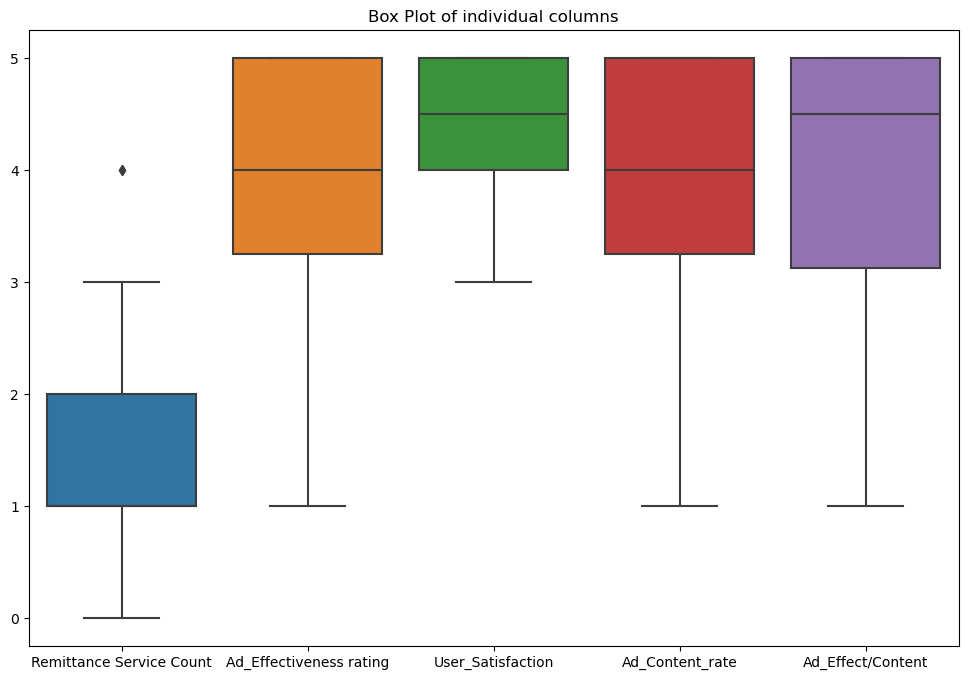

In [49]:
#Checking if the data is skewed

plt.figure(figsize=(12, 8)) 
sns.boxplot(data=Data_2)

plt.title('Box Plot of individual columns')


plt.show()

In [50]:
''' Remittance Service Count colunm is rightly skewed and has an outlier
 Ad_Effectiveness rating is left skewed
 User_Satisfaction is rightly skewed
 Ad_Content_rate is symmetrically distributed '''

' Remittance Service Count colunm is rightly skewed and has an outlier\n Ad_Effectiveness rating is left skewed\n User_Satisfaction is rightly skewed\n Ad_Content_rate is symmetrically distributed '

In [51]:
#Saving explored data
Data_2.to_excel('explored_responses.xlsx', index=False)

In [59]:
#find correlation in two columns
Data_2['Ad_Effectiveness rating'].corr(Data_2['Ad_Content_rate'])

0.5291857850809084

In [60]:
'''A correlation coefficient of 0.529 suggests a moderate positive correlation
There is a tendency for higher effectiveness ratings to be associated with higher content rate'''

'A correlation coefficient of 0.529 suggests a moderate positive correlation\nThere is a tendency for higher effectiveness ratings to be associated with higher content rate'

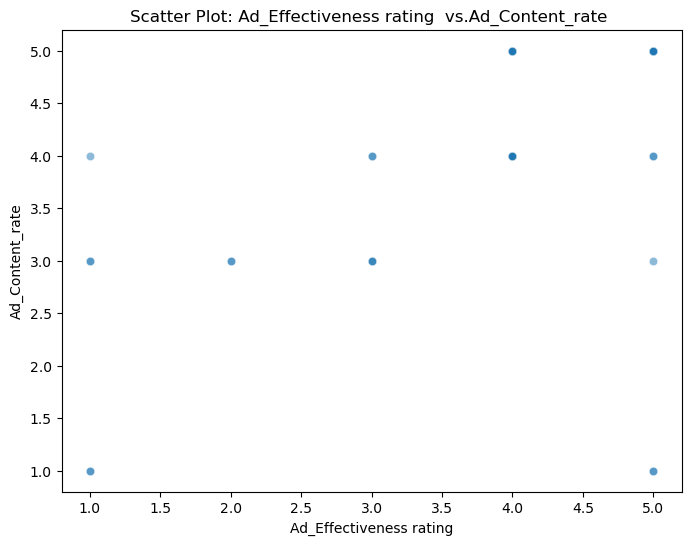

In [61]:
# visually
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Ad_Effectiveness rating', y='Ad_Content_rate', data=Data_2, alpha=0.5)
plt.title('Scatter Plot: Ad_Effectiveness rating  vs.Ad_Content_rate ')
plt.show()

In [63]:
#selecting only numeric fields in the data
numeric = Data_2.select_dtypes(include=['int64','float64']) 
numeric.head(2)

,Remittance Service Count,Ad_Effectiveness rating,User_Satisfaction,Ad_Content_rate,Ad_Effect/Content
0,1,5,4,5,5.0
1,1,4,4,5,4.5


<Axes: >

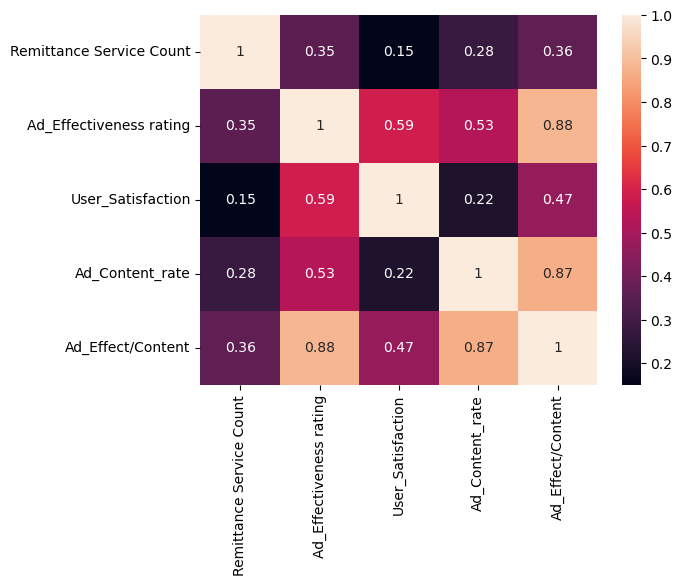

In [64]:
#Checking for correlation in the data
sns.heatmap(numeric.corr(),annot=True, xticklabels = numeric.corr().columns,yticklabels = numeric.corr().columns)